Mounted at /content/drive


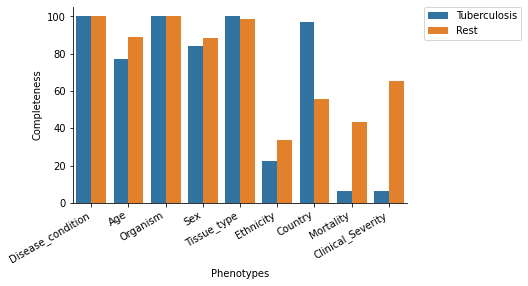

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df1=pd.read_excel('/content/drive/MyDrive/Metadata_Summary_Table (1).xlsx',sheet_name='Sheet17')
df = df1.drop(df1[df1.Disease != 'Tuberculosis'].index)
df_r = df1.drop(df1[df1.Disease == 'Tuberculosis'].index).reset_index(drop=True)
df = df.append({'Phenotypes':'Disease_condition', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Disease_condition', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
df = df.append({'Phenotypes':'Age', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Age', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
df = df.append({'Phenotypes':'Organism', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Organism', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
df = df.append({'Phenotypes':'Sex', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Sex', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
df = df.append({'Phenotypes':'Tissue_type', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Tissue_type', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
df = df.append({'Phenotypes':'Ethnicity', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Ethnicity', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
df = df.append({'Phenotypes':'Country', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Country', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
df = df.append({'Phenotypes':'Mortality', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Mortality', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
df = df.append({'Phenotypes':'Clinical_Severity', 'Completeness': df_r.loc[df_r['Phenotypes'] == 'Clinical_Severity', 'Completeness'].mean(), 'Disease':'Rest'},ignore_index=True)
p1=sns.barplot(data=df,x='Phenotypes',y='Completeness',ci='sd',hue='Disease')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gcf().autofmt_xdate()
p1.spines['top'].set_visible(False)
p1.spines['right'].set_visible(False)

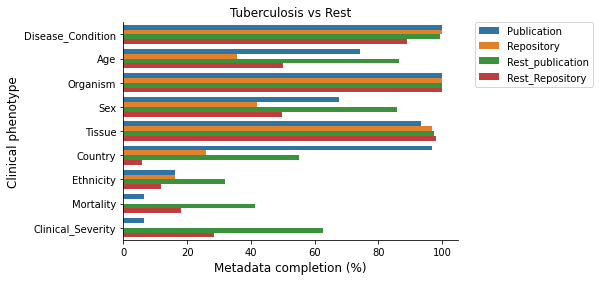

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df3=pd.read_excel('/content/drive/MyDrive/Metadata_Summary_Table (1).xlsx',sheet_name='Sepsis')
df3.drop(columns='Completeness')
df4=pd.read_excel('/content/drive/MyDrive/Metadata_Summary_Table (1).xlsx',sheet_name='AD').dropna()
df5=pd.read_excel('/content/drive/MyDrive/Metadata_Summary_Table (1).xlsx',sheet_name='AML').dropna()
df6=pd.read_excel('/content/drive/MyDrive/Metadata_Summary_Table (1).xlsx',sheet_name='IBD').dropna()
df7=pd.read_excel('/content/drive/MyDrive/Metadata_Summary_Table (1).xlsx',sheet_name='CVD').dropna()
rest = pd.concat([df3, df4, df5, df6, df7]).drop(columns='Completeness').reset_index(drop=True)
rest = (rest.set_index(["Phenotype"])
         .stack()
         .reset_index(name='Completeness')
         .rename(columns={'level_1':'Location'}))
rest.loc[(rest['Phenotype'] == 'Disease_Condition') & (rest['Location']=='Publication'), 'Completeness'].mean()
df1=pd.read_excel('/content/drive/MyDrive/Metadata_Summary_Table (1).xlsx',sheet_name='TB').dropna()
df1 = (df1.set_index(["Phenotype"])
         .stack()
         .reset_index(name='Completeness')
         .rename(columns={'level_1':'Location'}))
df1 = df1.append({'Phenotype':'Disease_Condition', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Disease_Condition') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Disease_Condition', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Disease_Condition') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Age', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Age') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Age', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Age') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Organism', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Organism') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Organism', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Organism') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Sex', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Sex') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Sex', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Sex') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Tissue', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Tissue') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Tissue', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Tissue') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Country', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Country') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Country', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Country') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Ethnicity', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Ethnicity') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Ethnicity', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Ethnicity') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Mortality', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Mortality') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Mortality', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Mortality') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Clinical_Severity', 'Location':'Rest_publication', 'Completeness': rest.loc[(rest['Phenotype'] == 'Clinical_Severity') & (rest['Location']=='Publication'), 'Completeness'].mean()},ignore_index=True)
df1 = df1.append({'Phenotype':'Clinical_Severity', 'Location':'Rest_Repository', 'Completeness': rest.loc[(rest['Phenotype'] == 'Clinical_Severity') & (rest['Location']=='Repository'), 'Completeness'].mean()},ignore_index=True)
p2=sns.barplot(data=df1,x='Completeness',y='Phenotype',hue='Location')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
p2.set_xlabel("Metadata completion (%)", fontsize = 12,color='black')
p2.set_ylabel("Clinical phenotype", fontsize = 12,color='black')
p2.set_title("Tuberculosis vs Rest", fontsize = 12,color='black')
p2.spines['top'].set_visible(False)
p2.spines['right'].set_visible(False)